In [108]:
import numpy as np
import matplotlib.pyplot as plt

In [109]:
def coef(points): #函数嵌套迭代
    if len(points) == 1:
        return points[0, 1]
    return (coef(points[1:]) - coef(points[:-1])) / (points[-1, 0] - points[0, 0])

def Newton(point):
    points = np.array(point)
    n = len(points)
    coef_array = np.zeros(n)

    for i in range(n):
        coef_array[i] = coef(points[:i+1])
    
    def f(x):
        y = 0
        for i in range(n):
            x_i = 1
            for k in range(0, i):
                x_i *= (x - points[k, 0])
            y += coef_array[i] * x_i
        return y
    
    return f

# 编程 3.3-4

In [110]:
def f(x):
    return np.exp(np.abs(x))

def chebyshev(n):
    return np.array([np.cos((2*i + 1)*np.pi/(2*n)) for i in range(n)])

## n=10，均匀插值

In [111]:
xa1=np.linspace(-1,1,11)
fa1=Newton(np.array([xa1,f(xa1)]).T)

## n=10，切比雪夫插值

In [112]:
xa2=chebyshev(11)
fa2=Newton(np.array([xa2,f(xa2)]).T)

## n=10，函数图

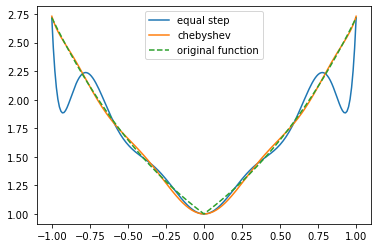

In [113]:
px=np.arange(-1,1.01,0.01)
plt.plot(px,fa1(px),label='equal step')
plt.plot(px,fa2(px),label='chebyshev')
plt.plot(px,f(px),'--',label='original function')
plt.legend()

## n=10，误差图

In [114]:
def fa1e(x):
    f=1
    for i in range(11):
        f=f*(x-xa1[i])
    return f

def fa2e(x):
    f=1
    for i in range(11):
        f=f*(x-xa2[i])
    return f

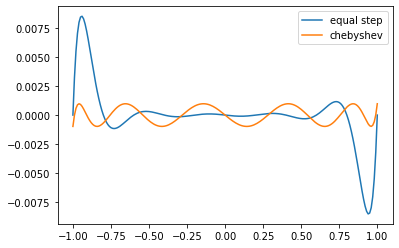

In [115]:
px=np.arange(-1,1.01,0.01)
plt.plot(px,fa1e(px),label='equal step')
plt.plot(px,fa2e(px),label='chebyshev')
plt.legend()

## 均匀插值出现了龙格现象，切比雪夫插值没有出现

## n=20，均匀插值

In [116]:
xb1=np.linspace(-1,1,21)
fb1=Newton(np.array([xb1,f(xb1)]).T)

## n=20，切比雪夫插值

In [117]:
xb2=chebyshev(21)
fb2=Newton(np.array([xb2,f(xb2)]).T)

## n=20，函数图

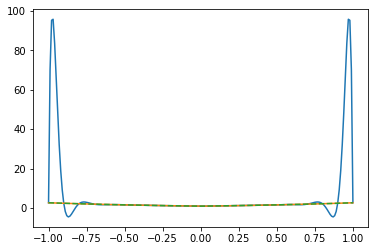

In [118]:
px=np.arange(-1,1.01,0.01)
plt.plot(px,fb1(px))
plt.plot(px,fb2(px))
plt.plot(px,f(px),'--')

## n=20，误差图

In [119]:
def fb1e(x):
    f=1
    for i in range(21):
        f=f*(x-xb1[i])
    return f

def fb2e(x):
    f=1
    for i in range(21):
        f=f*(x-xb2[i])
    return f

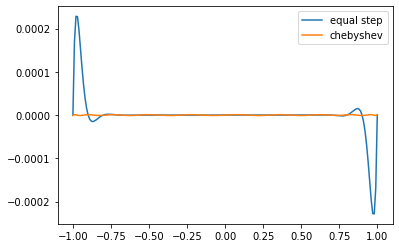

In [120]:
px=np.arange(-1,1.01,0.01)
plt.plot(px,fb1e(px),label='equal step')
plt.plot(px,fb2e(px),label='chebyshev')
plt.legend()

## 均匀插值出现了龙格现象，切比雪夫插值没有出现